<a href="https://colab.research.google.com/github/A-Midhat/Computer-Vision/blob/main/alimidhat_CV_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Ali Midhat Abdelgadir Abdalla


##Importing the required libraries
This part of the code sets everything up for my CNN model.
I’m using Keras, and matplotlib for visualizing and plotting the accuracy and losses.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt


##Loading the cifar10 dataset
splitting the data into (train, test) data,
and converting the labels into one-hot-encoding isntead of the normal [0:10] representaion.
printing the shape of the data so i can build my model around these shapes, e.g. 10 classes so my last FC layer would be 10 neurons.

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
print(f"x_train: {x_train.shape}\ny_train:{y_train.shape}\nx_test: {x_test.shape}\ny_test {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
x_train: (50000, 32, 32, 3)
y_train:(50000, 10)
x_test: (10000, 32, 32, 3)
y_test (10000, 10)


##Model_1

### Building the CNN Model
The model summary will show the details of each layer and how many parameters we have.


In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model_1
Compiling the model using Adam optimizer (good for large datasets),
using crossentropy cost function because its best for multi-class classifiaction, finally the metrics is accuracy to evaluate the model predictions.


In [ ]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

###Traning the Model_1
i started with only 20 epochs to see monitor the model (i will increase it in the next model), and take 20% of the data as validation data to see how it handle unseen data or i cantch if any overfitting happens

In [ ]:
training_result = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 93ms/step - accuracy: 0.2859 - loss: 2.8917 - val_accuracy: 0.4564 - val_loss: 1.5019
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 86ms/step - accuracy: 0.4965 - loss: 1.3951 - val_accuracy: 0.5577 - val_loss: 1.2519
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.5840 - loss: 1.1694 - val_accuracy: 0.5663 - val_loss: 1.2429
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.6306 - loss: 1.0502 - val_accuracy: 0.5828 - val_loss: 1.2036
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 81ms/step - accuracy: 0.6655 - loss: 0.9444 - val_accuracy: 0.6028 - val_loss: 1.1582
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.6965 - loss: 0.8678 - val_accuracy: 0.6166 - val_loss: 1.1278
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7162 - loss: 0.7978 - val_accuracy: 0.6308 - val_loss: 1.0949
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7451 - loss: 0.7298 - 

###Model_1 Evaluation on test data

The model peformed poorly with test accuracy of 62%, but regarding its very small cnn and no reglurization techniques was used

In [ ]:
# Model Evaluation
test_loss, test_Acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_Acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6216 - loss: 1.7557
Test Loss: 1.7892543077468872
Test Accuracy: 0.614799976348877


###Plotting Both (Training_loss/Validation_Loss) and (Training_Accuracy/Validation_Accuracy)
To catch if the model needed any adjustments, e.g. if the difference is signficatnly large between the val_loss and train_loss.

The model defintly overfits after 2 epochs only, which is why it is a very basic model, but what i find strange is the val_loss is less than train_loss, which is weird but my thoughts are (the validations happens at the end of the epoch , which at then the model could have be trained a little) this is just a suspicion for this weird behaviour .

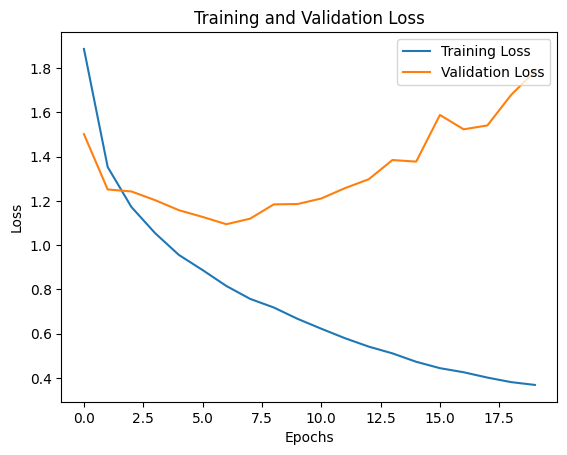

In [ ]:
plt.plot(training_result.history["loss"], label="Training Loss")
plt.plot(training_result.history["val_loss"], label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

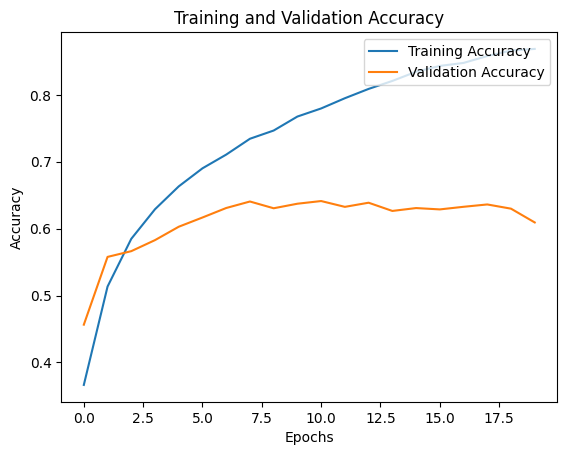

In [ ]:
plt.plot(training_result.history["accuracy"], label="Training Accuracy")
plt.plot(training_result.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()


###Observations on Model_1:

*The training losses decreases over epochs while the validation losses
start to increse around the epoch 7~7.5, which means the model starting to overfit
and struggles to new unseen data (validation sets), also the large accuracy gap (<25%) which probably means the
same thing (overfitting).
I will complicate the model a bit and add
multiple layers and regulaization techniques, to get a better result.*


##Model_2

###Normalization of the inputs
X is matrix of pixel intensiteis , so it holds a value between (0~255), dividing by 255 let them be between (0,1), so large values dont lead to exploding weights (when multipying the kerenl with input matrix)

In [ ]:
# Normalization of the input values between 0 and 1
x_train, x_test = x_train/255.0 , x_test/ 255.0


###Regularization
before that i adjusted the default lr of adam from (0.001 to 0.0001) to make the traing more stable. \
Added a droput layer to turn off 25% of neurons to prevent them from overfitting. \
Increased the complexity of the model by increseing the layers and number of neurons at each layer.

In [ ]:
# importing adam directly so i can adjust the learning rate
from keras.optimizers import Adam
from keras.layers import Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3),),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")

])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 385,162 (1.47 MB)

 Trainable params: 385,162 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

###Early stopping
To cut off the model training if it satrts overfitting, and save the last best weight. \
ModelCheckpoint was just an extra process in case Colab disconnects (which happens alot).

In [ ]:
# implementing Early stopping before the model starts to overfit
from keras.callbacks import EarlyStopping, ModelCheckpoint # to handle colab's disconnecting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint("model_2.keras", save_best_only=True)
 # to stablize more we reduce the lr
adam = Adam(learning_rate=0.0001)
model.compile(
    optimizer=adam,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

###Training of Model_2
increasing the batch size to update the weights in a stable manner. \
No. of epochs increased to let the model converge.

In [ ]:
training_result_2 = model.fit(
    x_train, y_train, batch_size=128, epochs=50, validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.1809 - loss: 2.1825 - val_accuracy: 0.3567 - val_loss: 1.7477
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3487 - loss: 1.7418 - val_accuracy: 0.4252 - val_loss: 1.5624
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4115 - loss: 1.5861 - val_accuracy: 0.4656 - val_loss: 1.4772
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4481 - loss: 1.5080 - val_accuracy: 0.4879 - val_loss: 1.4171
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4741 - loss: 1.4318 - val_accuracy: 0.5147 - val_loss: 1.3565
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4914 - loss: 1.3872 - val_accuracy: 0.5378 - val_loss: 1.2977
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5163 - loss: 1.3342 - val_accuracy: 0.5522 - val_loss: 1.2639
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5322 - loss: 1.2983 - val_accuracy: 

###Plotting Both (Training_loss/Validation_Loss) and (Training_Accuracy/Validation_Accuracy)
The same weird phenomenon occures again but it with a slightly difference between the val_loss and train_loss, though the line goes down smoothly and overfits occurs after around (20 epochs)

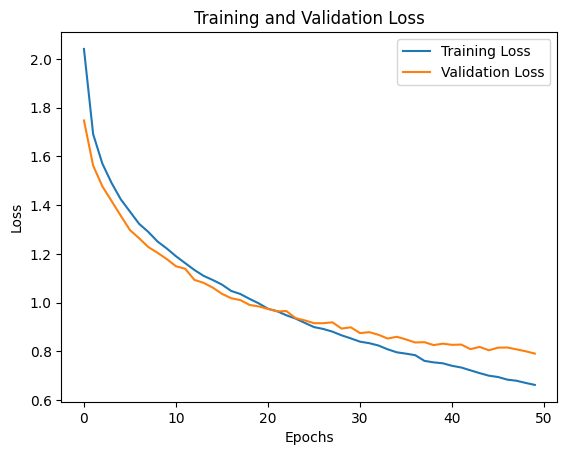

In [ ]:
plt.plot(training_result_2.history["loss"], label="Training Loss")
plt.plot(training_result_2.history["val_loss"], label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

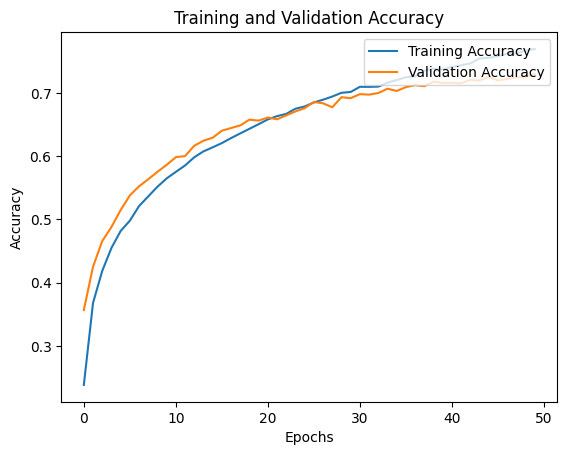

In [ ]:
plt.plot(training_result_2.history["accuracy"], label="Training Accuracy")
plt.plot(training_result_2.history["val_accuracy"], label="Validation Accuracy")
plt.legend(loc="upper right")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()

###Model_2 test results

The model imporved 10% more than model 1 by scoring test accuracy with 73%

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}\nTest Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7304 - loss: 0.7818
Test Loss: 0.7941000461578369
Test Accuracy: 0.7264000177383423


###Observation on Model_2
*The techinques applied (Normailization, Regularization), benefited the model by enhancing its performance compared to Model_1, lowring down the validation loss to (<1) unlike model1. The results showed a significant improvement in all metrics. This model showed that it can be generlized to unseen data better than model_1, But the model 2 still overfits after (>20 epochs).*

#Part 2:
**Transfer Learning**

##importing required libraries:

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications import VGG19
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

import matplotlib.pyplot as plt

##Normalization and one-hot encoding of the data same as before:

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


##Freezing the Conv. layers and exclude the fc layers

*https://keras.io/guides/transfer_learning/*

In [ ]:
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in vgg19.layers:
  layer.trainable = False
  print(layer)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<Conv2D name=block3_conv4, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<Conv2D name=block4_conv4, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<Conv2D name=block5_conv4, built=True>
<MaxPooling2D name=block5_pool, built=True>


##Adding the vgg to my model:

the resizing layer is to trasform the input image (cifar10) into 224 by 224 which the size of the VGG handels data (trained on imagenet)

In [ ]:
from keras.layers import Resizing
model = Sequential([
    Resizing(224,224),
    vgg19,
    Flatten(),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

##Compiling the Model

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

##Training the model
The model results were horrible, (Considering its a pretrained model),  some more regularization techniques are required.

In [ ]:
training_results_vgg19 = model.fit(
    x_train, y_train, batch_size=64, epochs=25, validation_split=0.25,
    callbacks=[EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)]
)

Epoch 1/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 300s 473ms/step - accuracy: 0.4523 - loss: 1.6229 - val_accuracy: 0.5765 - val_loss: 1.1873
Epoch 2/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 283s 443ms/step - accuracy: 0.6490 - loss: 0.9958 - val_accuracy: 0.6637 - val_loss: 0.9684
Epoch 3/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 238s 402ms/step - accuracy: 0.6963 - loss: 0.8662 - val_accuracy: 0.6587 - val_loss: 0.9535
Epoch 4/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 262s 402ms/step - accuracy: 0.7253 - loss: 0.7841 - val_accuracy: 0.6950 - val_loss: 0.8962
Epoch 5/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 262s 402ms/step - accuracy: 0.7437 - loss: 0.7326 - val_accuracy: 0.7086 - val_loss: 0.8527
Epoch 6/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 285s 442ms/step - accuracy: 0.7596 - loss: 0.6737 - val_accuracy: 0.6593 - val_loss: 1.0387
Epoch 7/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 238s 402ms/step - accuracy: 0.7780 - loss: 0.6300 - val_accuracy: 0.7129 - val_loss: 0.8395
Epoch 8/25
586/586 ━━━━━━━━━━━━━━━━━━━━ 236s 403ms/step - accuracy: 0.8018 -

##Plotting

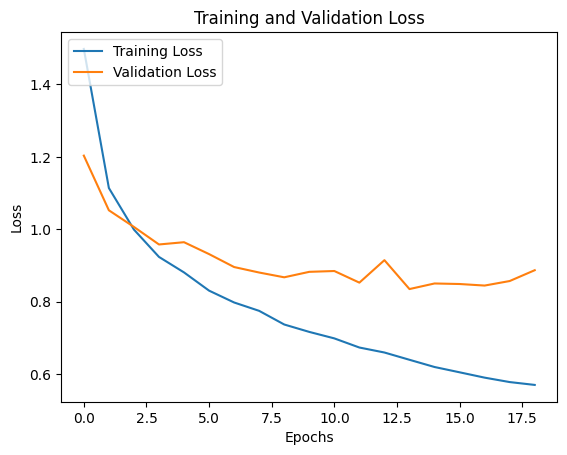

In [ ]:
plt.plot(training_results_vgg19.history["loss"], label="Training Loss")
plt.plot(training_results_vgg19.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend(loc="upper left")
plt.show()

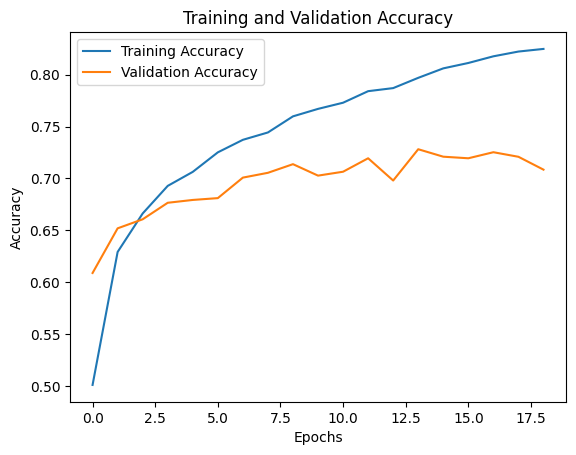

In [ ]:
plt.plot(training_results_vgg19.history["accuracy"], label="Training Accuracy")
plt.plot(training_results_vgg19.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend(loc="upper left")
plt.show()

##Observation
The model scores were horrible, diregarding the overfitting , which is obvious from the plots, the model scores were horrible than model 2, this could be due several reasons:


1.   fact is VGG is trained on 224,224 sizes and the cifar10 orginal sizes is 32 by 32
2.   in addition to the bad resultion of the images, so resizing the images would be harder for the model to pefrom well.
3. VGG performs poorly compared to other models (e.g. inception )

Note: althought i tried regulrizing (e.g. L2), adding several layers, lowering the learning rate but all lead to the same result.

#Part3

## Mounting google drive account to load the image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*https://github.com/EliSchwartz/imagenet-sample-images/blob/master/n01532829_house_finch.JPEG* where i got the image

In [ ]:
img_path = '/content/drive/MyDrive/n01532829_house_finch_12.jfif'


##Importing important libraries
*https://matplotlib.org/stable/tutorials/images.html*

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg19 import VGG19 , preprocess_input

##Mask function:

which define the occluded part with a size of (8,8).
The logic here is i used two for loops one for the x-axis (224) and the other for y-axis(224), both with step size of mask_size (so the part that was occluded, doesnt get occluded again).
So I take the occluded image and reset it at each iteration, so to represent the box 'moving' across the image.
Then the it appends the 'ocluded array' to a list which i will use some preprocessing kras functions to fi the model.

In [ ]:
def mask(image, mask_size):
    image = np.squeeze(image) # git rid of the 1s dimensions
    occluded_images = []
    for x in range(0, image.shape[0], mask_size):
      for y in range(0, image.shape[1], mask_size):
        occ_img = image.copy() # reset to original image after each iteration
        # (aka moving the box)
        # set the boundries for the mask
        x_end = min(x+mask_size, image.shape[0])
        y_end = min(y+mask_size, image.shape[1])

        # turns off the pixel (black)
        occ_img[x:x_end, y:y_end, :]=0
        occluded_images.append(occ_img)
    return occluded_images




(224, 224, 3)

##Reshaping the image
Resizing the image to 224,224 to fit into the VGG19 model, more preprocessing will come.

In [ ]:
original_image = Image.open(img_path)
resized_image = original_image.resize((224,224))

# convert the pillow object into numpy array to work with.
img_array = np.asarray(resized_image)
img_array.shape

(224, 224, 3)

##Masked Images

returns a list that contain the same image with different part occluded.

In [ ]:
masked_images_list = mask(img_array, 8) # changed the mask size from 20 to 8 , becaue 20 got me a grid of  (12,12), which is way small
# masked_image = masked_images_list[60] #for testing


##Preprocess the image to fit the model (testing)

In [ ]:
# img_to_model = np.expand_dims(img_array, axis=0) # add extra dim (1)
# img_to_model = preprocess_input(img_to_model) # normalize , scale, ...
# img_to_model.shape

# tesing single image (masked)
# img_to_model = np.expand_dims(masked_image, axis=0)
# img_to_model = preprocess_input(img_to_model)
# img_to_model.shape

(1, 224, 224, 3)

##Preprocess all masked images to fit the model  

 Preprocess the image (array) into a shape vgg19 would understand.
*   firstly add a dimension so it become (1 ,224 ,224 ,3)
*   More preprocessing to fit the model , e.g. Normlizing the pixels,



In [ ]:
img_to_model_list = []
for masked_image in masked_images_list:
    img_to_model = np.expand_dims(masked_image, axis=0) #axis to insert dim at position 0 ==> (1,224,224,3)
    img_to_model = preprocess_input(img_to_model)
    img_to_model_list.append(img_to_model)


##Initializing VGG19
Note: I choose VGG19 because I already used it in part 2.

In [ ]:
model = VGG19(weights="imagenet")

Since the Image I used was from Imagenet itself, so i already know the class number (12), so by using predict which returns the probality over all 1000 classes, i choose to append only the 12th element which is "House finch", this predicition list will alow me later after reshaping to draw the heatmap to see how the model react to different part of the mask in the image.

In [ ]:
# predict = model.predict(img_to_model)
# predict[0][12] # class 12 0.9992142

predicitions_list = []
for i,img in enumerate(img_to_model_list):
  print(f"image no: {i+1}")
  predict = model.predict(img)
  # appends only the 12th (house finch) class.
  predicitions_list.append(predict[0][12])


image no: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 845ms/step
image no: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step
image no: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
image no: 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
image no: 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step
image no: 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
image no: 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
image no: 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 750ms/step
image no: 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
image no: 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
image no: 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
image no: 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
image no: 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708m

In [ ]:
len(predicitions_list) # it should be 784

784

##Show the masking examples


In [ ]:
def display_images(occluded_images):
  c = 0
  for img in range(0,len(occluded_images), 56): # so it doesnt show all 784 images

    plt.imshow(occluded_images[img])
    plt.axis(False)
    plt.title(f"{c+1} img")
    plt.show()
    c+=56 # just to count images number

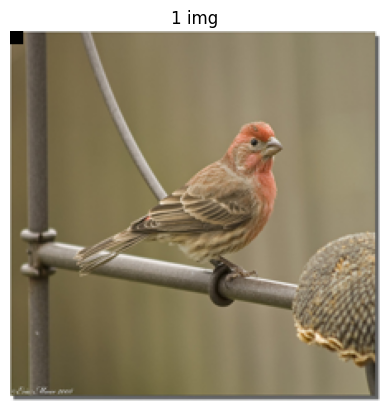

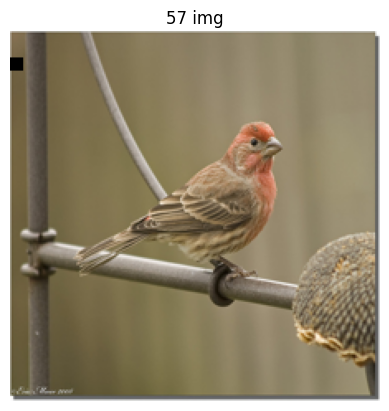

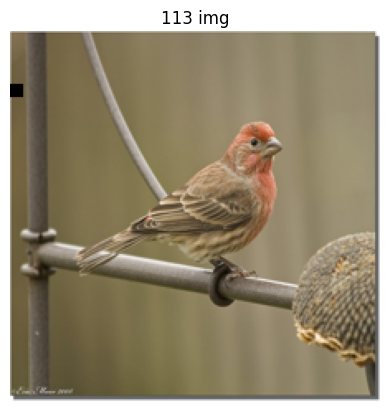

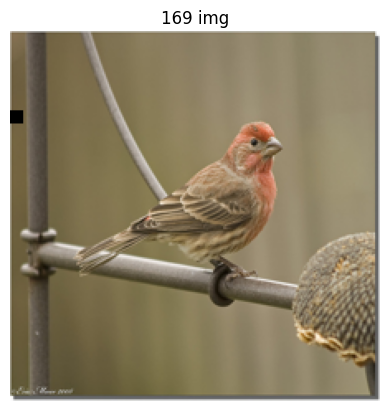

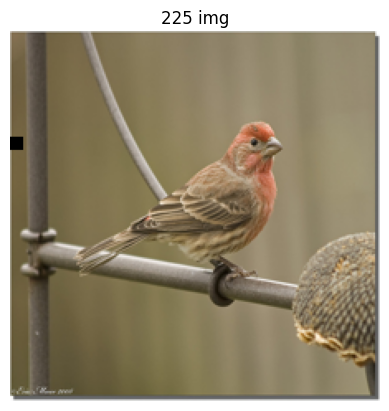

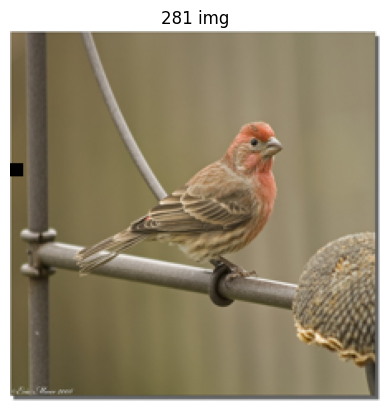

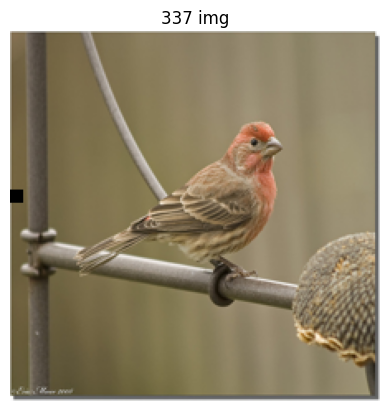

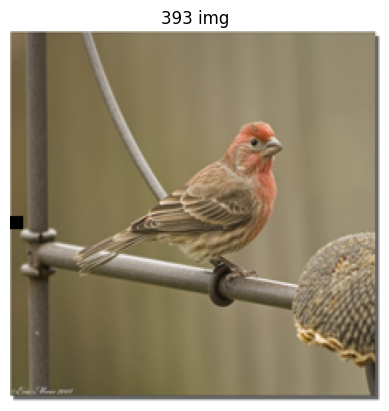

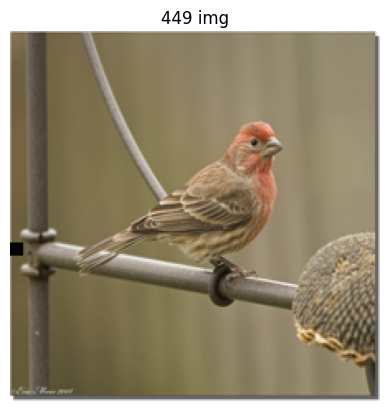

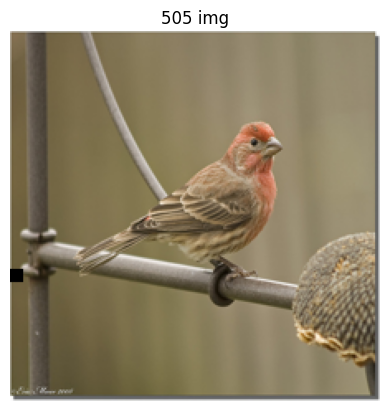

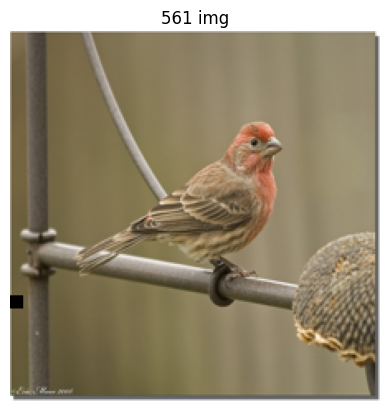

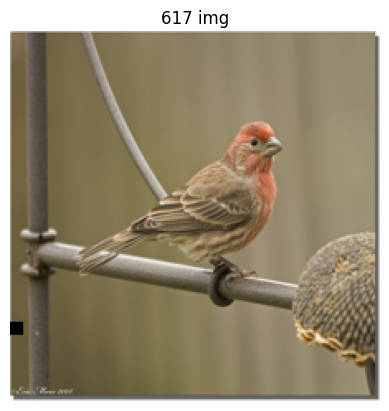

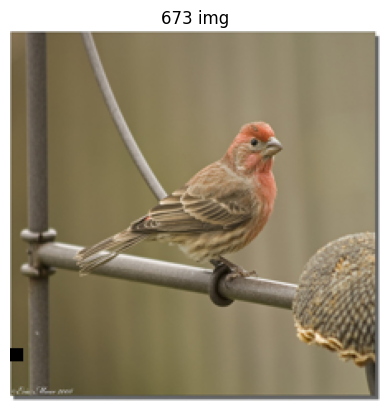

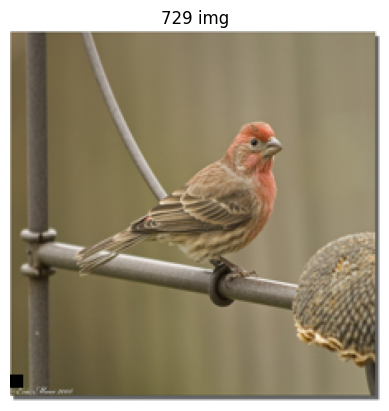

In [ ]:
display_images(masked_images_list) # it is a coincidence that the choosen images has the box moves only vertically :)

##Heatmap
Since there 784 images, I choose to reshape it into 28 by 28 , to show how the mask affects the model prediction at each part, as it appear it diddnt have any major effect.

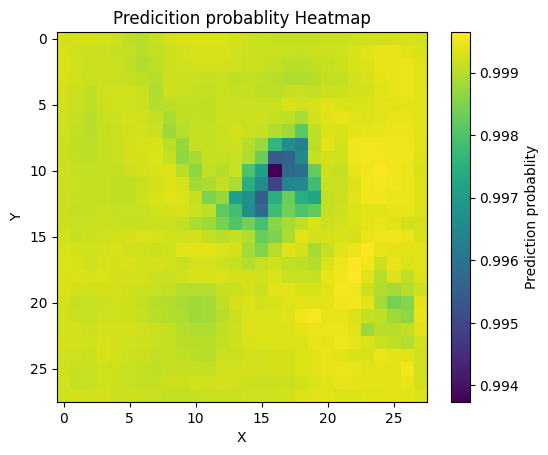

In [ ]:
grid_size = 28 #224/8
predictions_grid = np.array(predicitions_list).reshape((grid_size, grid_size))

plt.imshow(predictions_grid)
plt.colorbar(label="Prediction probablity")
plt.title("Predicition probablity Heatmap")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()


##Results:

The model still predicted high predictions even at the part of the mask occluded the bird face or any part of its body, and that probaly due to two factors


1.   I used an image that the model trained for (Imagenet)
2.  I used small mask box (8,8), which doesnt really hide a large part of the image (224,224)

thats probably why the model scored between worst (0.994) ~ best (0.999)

